In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
ds = pd.read_csv("adult.csv")
ds.replace('?', np.nan, inplace=True)
ds.dropna(inplace=True)

In [4]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
x_train[:, 1:]=imputer.fit_transform(x_train[:,1:]) 

In [7]:
from sklearn.preprocessing import LabelEncoder

ordinal_categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13]

label_encoders = []
for col_index in ordinal_categorical_columns:
    le = LabelEncoder()
    x_train[:, col_index] = le.fit_transform(x_train[:, col_index])
    x_test[:, col_index] = le.transform(x_test[:, col_index])
    label_encoders.append(le)

In [8]:
from sklearn.preprocessing import LabelEncoder
lb_obj= LabelEncoder() 
y_train=lb_obj.fit_transform(y_train)
y_test=lb_obj.transform(y_test)

In [9]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test contain both numerical and encoded categorical columns

scaler = StandardScaler()  
x_train_StandardScaled = scaler.fit_transform(x_train)
x_test_StandardScaled = scaler.transform(x_test)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_grid = {'max_depth': range(1, 21)}  # Test depths from 1 to 20

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

# Perform GridSearchCV
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='r2')  # Use cross-validation with 5 folds

# Fit the grid search to the data
grid_search.fit(x_train_StandardScaled, y_train)

# Get the best max_depth
best_max_depth = grid_search.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

# Retrieve the best model
best_model = grid_search.best_estimator_


Best max_depth: 7


In [11]:
from sklearn.tree import DecisionTreeRegressor
# Try two values of max_depth, 20 then changed it to 8  and notice the improvement in the r2_score value
regressor = DecisionTreeRegressor(random_state = 10,max_depth=7)
regressor.fit(x_train_StandardScaled, y_train)

DecisionTreeRegressor(max_depth=7, random_state=10)

In [12]:
# Ensure y_test and y_pred have equal lengths
# Predicting the test set results
y_pred = regressor.predict(x_test_StandardScaled)
length = min(len(y_test), len(y_pred))
y_test_trimmed = y_test[:length]
y_pred_trimmed = y_pred[:length]

# Concatenating the trimmed arrays
results = np.concatenate((y_pred_trimmed.reshape(length, 1), y_test_trimmed.reshape(length, 1)), axis=1)
print(results)


[[1.         1.        ]
 [0.39655172 0.        ]
 [0.03975994 0.        ]
 ...
 [0.25341131 0.        ]
 [0.70171891 0.        ]
 [0.39655172 0.        ]]


In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.42889201546184386

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the Grid of parameters to test
grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [0]
}

# Create GridSearchCV with DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, scoring='accuracy', cv=10, n_jobs=-1)
gs.fit(x_train_StandardScaled, y_train)

# Get the best accuracy using the best_score_ attribute of the grid search obj
best_accuracy = gs.best_score_

# Get the best parameters corresponding to this accuracy
best_parameters = gs.best_params_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)


Best Accuracy: 0.8520865420102142
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [19]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeRegressor
param_grid_regressor = {'max_depth': range(1, 21)}  # Test depths from 1 to 20

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

# Perform GridSearchCV for DecisionTreeRegressor
grid_search_regressor = GridSearchCV(regressor, param_grid_regressor, cv=5, scoring='r2')
grid_search_regressor.fit(x_train_StandardScaled, y_train)

# Get the best max_depth for DecisionTreeRegressor
best_max_depth_regressor = grid_search_regressor.best_params_['max_depth']
print("Best max_depth for Regressor:", best_max_depth_regressor)

# Retrieve the best regressor model
best_regressor_model = grid_search_regressor.best_estimator_

# For DecisionTreeClassifier

# Create the Grid of parameters to test for DecisionTreeClassifier
param_grid_classifier = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [0]
}

# Create GridSearchCV with DecisionTreeClassifier
grid_search_classifier = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_classifier, scoring='accuracy', cv=10, n_jobs=-1)
grid_search_classifier.fit(x_train_StandardScaled, y_train)

# Get the best accuracy using the best_score_ attribute of the grid search obj for DecisionTreeClassifier
best_accuracy_classifier = grid_search_classifier.best_score_

# Get the best parameters corresponding to this accuracy for DecisionTreeClassifier
best_parameters_classifier = grid_search_classifier.best_params_

print("Best Accuracy for Classifier:", best_accuracy_classifier)
print("Best Parameters for Classifier:", best_parameters_classifier)


Best max_depth for Regressor: 7
Best Accuracy for Classifier: 0.8520865420102142
Best Parameters for Classifier: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier with the best parameters
best_classifier = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=2, random_state=0)

# Fit the classifier with the training data
best_classifier.fit(x_train_StandardScaled, y_train)


DecisionTreeClassifier(max_depth=8, random_state=0)

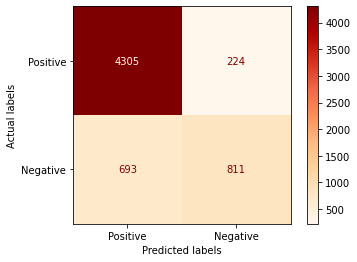

Accuracy: 0.8480026520802254
Recall: 0.5392287234042553
Precision: 0.7835748792270532
F1-score: 0.6388341866876724
AUC: 0.8929444202374298


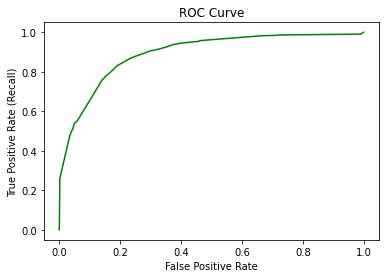

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create and fit the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=2, random_state=0)
decision_tree.fit(x_train, y_train)

# Predict on the test set using the decision tree model
y_pred = decision_tree.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])  # Replace with your class labels
disp.plot(cmap=plt.cm.OrRd)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))  # By default, pos_label=1 for binary classification
print("Precision:", precision_score(y_test, y_pred))  # By default, pos_label=1 for binary classification
print("F1-score:", f1_score(y_test, y_pred))  # By default, pos_label=1 for binary classification

# Plotting the ROC curve and calculating the AUC
y_pred_prob = decision_tree.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])  # Assuming 1 is your positive label
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='green')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()


In [25]:
# Confirming the results from the confusion matrix
accuracy=(4305+811)/(4305+811+224+693)
recall= (811)/(811+693)
precision = (811)/(811+224)
print("Accuracy : ", accuracy )
print("Recall : ",recall)
print("Precision: ", precision)
print("F1-score: ", 2*(precision*recall/(precision+recall)))

Accuracy :  0.8480026520802254
Recall :  0.5392287234042553
Precision:  0.7835748792270532
F1-score:  0.6388341866876724
